In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pathlib

In [2]:
# Set data input folder
# Download files described in README.md to this folder
input_folder = "inputs"

# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

In [3]:
#load barcodes used in experiment
guide_df = pd.read_csv('../common_files/Barcodes.csv')
guide_list = list(guide_df['sgRNA'])

#the plates used in each screen
A549_plates = ['CP186A','CP186B','CP186C','CP186D','CP186E','CP186F','CP186G','CP186H','CP186N']
dmem_plates = ['CP257A','CP257B','CP257D','CP257F','CP257H']
hplm_plates = ['CP257J','CP257K','CP257L','CP257N']

A549_list = []
dmem_list=[]
hplm_list=[]

#load and concatenate all A549 single cell metadata
for plate in A549_plates:
    filename = f'Single_cell_metadata/20200805_A549_WG_Screen_single_cell_metadata_{plate}_ALLWELLS.csv.gz'
    pre_df = pd.read_csv(filename).drop('Unnamed: 0',axis=1)
    A549_list.append(pre_df)

df_A549_metadata = pd.concat(A549_list)

#load and concatenate all dmem arm single cell metadata
for plate in dmem_plates:
    filename = f'Single_cell_metadata/20210422_6W_CP257_single_cell_metadata_{plate}_ALLWELLS.csv.gz'
    pre_dmem_df = pd.read_csv(filename).drop('Unnamed: 0',axis=1)
    dmem_list.append(pre_dmem_df)

df_DMEM_metadata = pd.concat(dmem_list)

#load and concatenate all hplm arm single cell metadata
for plate in hplm_plates:
    filename = f'Single_cell_metadata/20210422_6W_CP257_single_cell_metadata_{plate}_ALLWELLS.csv.gz'
    pre_hplm_df = pd.read_csv(filename)
    hplm_list.append(pre_hplm_df)

df_HPLM_metadata = pd.concat(hplm_list).drop('Unnamed: 0',axis=1)

df_DMEM_metadata.head()

,Metadata_Foci_Parent_Cells,Metadata_Foci_Cell_Quality_Index,Metadata_Foci_Barcode_MatchedTo_GeneCode,Metadata_Foci_Barcode_MatchedTo_Barcode,Metadata_Foci_Barcode_MatchedTo_Score_mean,Metadata_Foci_Barcode_MatchedTo_Score_count,Metadata_Foci_cell_quality_method,Metadata_Foci_ImageNumber,Metadata_Foci_site,Metadata_Foci_plate,...,Metadata_Nuclei_ObjectNumber_x,Metadata_Foci_Cell_Quality,Metadata_Cells_ImageNumber_y,Metadata_Cells_Parent_Nuclei_y,Metadata_Cytoplasm_ImageNumber_y,Metadata_Cytoplasm_ObjectNumber_y,Metadata_Cytoplasm_Parent_Cells_y,Metadata_Cytoplasm_Parent_Nuclei_y,Metadata_Nuclei_ImageNumber_y,Metadata_Nuclei_ObjectNumber_y
0,3,1,TTC21B,ACTAGTCTCATCAAGTGTCA,1.0,2,simple,332,CP257A-Well2-59,CP257A,...,3,Perfect,332.0,3.0,332.0,3.0,3.0,3.0,332.0,3.0
1,4,1,TMEM95,CTGACAAGTCGTGGGCTGGG,1.0,4,simple,332,CP257A-Well2-59,CP257A,...,4,Perfect,332.0,4.0,332.0,4.0,4.0,4.0,332.0,4.0
2,6,1,nontargeting,GTTGCCACATCCCACCAACG,1.0,2,simple,332,CP257A-Well2-59,CP257A,...,6,Perfect,332.0,6.0,332.0,6.0,6.0,6.0,332.0,6.0
3,8,1,MPZL2,ATTAACAGCCTCCAGCACCC,1.0,1,simple,332,CP257A-Well2-59,CP257A,...,8,Perfect,332.0,8.0,332.0,8.0,8.0,8.0,332.0,8.0
4,10,1,ELOVL1,GTGATGGAAGACATGTAGGA,1.0,1,simple,332,CP257A-Well2-59,CP257A,...,10,Perfect,332.0,10.0,332.0,10.0,10.0,10.0,332.0,10.0


In [4]:
#organize the data and calculate cell count per gene and per guide
df_A549_count_gene = df_A549_metadata['Metadata_Foci_Barcode_MatchedTo_GeneCode'].value_counts().to_frame().reset_index()
df_A549_count_gene.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_GeneCode",
             "Metadata_Foci_Barcode_MatchedTo_GeneCode": "Cell_Count"},inplace=True)
df_A549_count_guide = df_A549_metadata['Metadata_Foci_Barcode_MatchedTo_Barcode'].value_counts().to_frame().reset_index()
df_A549_count_guide.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_Barcode", 
             "Metadata_Foci_Barcode_MatchedTo_Barcode": "Cell_Count"},inplace=True)

df_DMEM_count_gene = df_DMEM_metadata['Metadata_Foci_Barcode_MatchedTo_GeneCode'].value_counts().to_frame().reset_index()
df_DMEM_count_gene.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_GeneCode",
             "Metadata_Foci_Barcode_MatchedTo_GeneCode": "Cell_Count"},inplace=True)
df_DMEM_count_guide = df_DMEM_metadata['Metadata_Foci_Barcode_MatchedTo_Barcode'].value_counts().to_frame().reset_index()
df_DMEM_count_guide.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_Barcode", 
             "Metadata_Foci_Barcode_MatchedTo_Barcode": "Cell_Count"},inplace=True)

df_HPLM_count_gene = df_HPLM_metadata['Metadata_Foci_Barcode_MatchedTo_GeneCode'].value_counts().to_frame().reset_index()
df_HPLM_count_gene.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_GeneCode",
             "Metadata_Foci_Barcode_MatchedTo_GeneCode": "Cell_Count"},inplace=True)
df_HPLM_count_guide = df_HPLM_metadata['Metadata_Foci_Barcode_MatchedTo_Barcode'].value_counts().to_frame().reset_index()
df_HPLM_count_guide.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_Barcode", 
             "Metadata_Foci_Barcode_MatchedTo_Barcode": "Cell_Count"},inplace=True)

# Number of unique barcodes and genes
A549_gene_n = len(df_A549_count_gene.Metadata_Foci_Barcode_MatchedTo_GeneCode.unique())
A549_guide_n = len(df_A549_count_guide.Metadata_Foci_Barcode_MatchedTo_Barcode.unique())

DMEM_gene_n = len(df_DMEM_count_gene.Metadata_Foci_Barcode_MatchedTo_GeneCode.unique())
DMEM_guide_n = len(df_DMEM_count_guide.Metadata_Foci_Barcode_MatchedTo_Barcode.unique())

HPLM_gene_n = len(df_HPLM_count_gene.Metadata_Foci_Barcode_MatchedTo_GeneCode.unique())
HPLM_guide_n = len(df_HPLM_count_guide.Metadata_Foci_Barcode_MatchedTo_Barcode.unique())

print('A549 screen = Unique genes #', A549_gene_n, 'Unique guides #', A549_guide_n, 'Total cell #', df_A549_count_gene.Cell_Count.sum())
print('HeLa DMEM screen = Unique genes #', DMEM_gene_n, 'Unique guides #', DMEM_guide_n, 'Total cell #', df_DMEM_count_gene.Cell_Count.sum())
print('HeLa HPLM screen = Unique genes #', HPLM_gene_n, 'Unique guides #', HPLM_guide_n, 'Total cell #', df_HPLM_count_gene.Cell_Count.sum())

A549 screen = Unique genes # 20393 Unique guides # 80860 Total cell # 11211357
HeLa DMEM screen = Unique genes # 20422 Unique guides # 84272 Total cell # 12319688
HeLa HPLM screen = Unique genes # 20421 Unique guides # 84253 Total cell # 9118260


In [5]:
#concatenate gene and guide cell counts into a single dataframe - calculate number of cells per guide and per gene
df_temp = guide_df[['gene_symbol','sgRNA']].rename(columns={"sgRNA":"Metadata_Foci_Barcode_MatchedTo_Barcode"})
df_A549_count = df_A549_count_guide.merge(df_temp,on='Metadata_Foci_Barcode_MatchedTo_Barcode').rename(columns={'gene_symbol':'Metadata_Foci_Barcode_MatchedTo_GeneCode'})
df_A549_count = df_A549_count[['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode','Cell_Count']]

df_DMEM_count = df_DMEM_count_guide.merge(df_temp,on='Metadata_Foci_Barcode_MatchedTo_Barcode').rename(columns={'gene_symbol':'Metadata_Foci_Barcode_MatchedTo_GeneCode'})
df_DMEM_count = df_DMEM_count[['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode','Cell_Count']]

df_HPLM_count = df_HPLM_count_guide.merge(df_temp,on='Metadata_Foci_Barcode_MatchedTo_Barcode').rename(columns={'gene_symbol':'Metadata_Foci_Barcode_MatchedTo_GeneCode'})
df_HPLM_count = df_HPLM_count[['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode','Cell_Count']]

df_A549_count_no_control = df_A549_count.query('Metadata_Foci_Barcode_MatchedTo_GeneCode != "nontargeting"')
A549_cells_per_gene = df_A549_count_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_GeneCode').sum().mean()[0]
A549_cells_per_guide = df_A549_count_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_Barcode').sum().mean()[0]

df_DMEM_count_no_control = df_DMEM_count.query('Metadata_Foci_Barcode_MatchedTo_GeneCode != "nontargeting"')
DMEM_cells_per_gene = df_DMEM_count_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_GeneCode').sum().mean()[0]
DMEM_cells_per_guide = df_DMEM_count_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_Barcode').sum().mean()[0]

df_HPLM_count_no_control = df_HPLM_count.query('Metadata_Foci_Barcode_MatchedTo_GeneCode != "nontargeting"')
HPLM_cells_per_gene = df_HPLM_count_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_GeneCode').sum().mean()[0]
HPLM_cells_per_guide = df_HPLM_count_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_Barcode').sum().mean()[0]

print('A549 screen = Number of cells per gene:', round(A549_cells_per_gene,2), 'Number of cells per guide:', round(A549_cells_per_guide,2))
print('HeLa DMEM screen = Number of cells per gene:', round(DMEM_cells_per_gene,2), 'Number of cells per guide:', round(DMEM_cells_per_guide,2))
print('HeLa HPLM screen = Number of cells per gene:', round(HPLM_cells_per_gene,2), 'Number of cells per guide:', round(HPLM_cells_per_guide,2))

A549 screen = Number of cells per gene: 459.78 Number of cells per guide: 116.6
HeLa DMEM screen = Number of cells per gene: 490.59 Number of cells per guide: 124.5
HeLa HPLM screen = Number of cells per gene: 366.35 Number of cells per guide: 92.99


In [6]:
# save the cell counts
df_A549_count.to_csv(os.path.join(output_folder,'A549_WG_Screen_cell_count.csv.gz'),index = False)
df_DMEM_count.to_csv(os.path.join(output_folder,'HeLa_DMEM_WG_Screen_cell_count.csv.gz'),index = False)
df_HPLM_count.to_csv(os.path.join(output_folder,'HeLa_HPLM_WG_Screen_cell_count.csv.gz'),index = False)

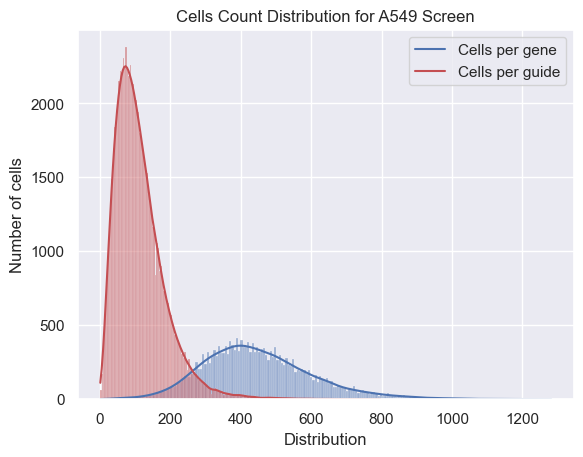

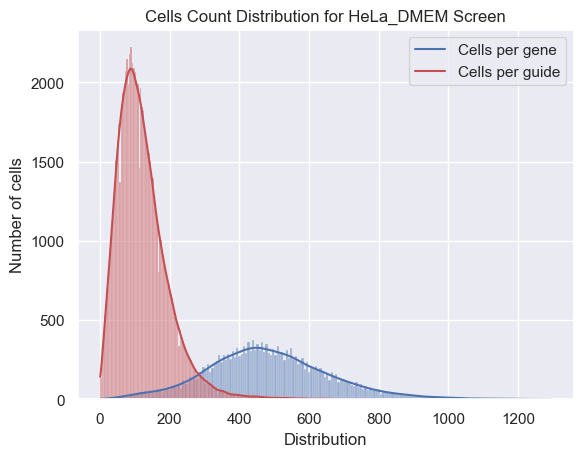

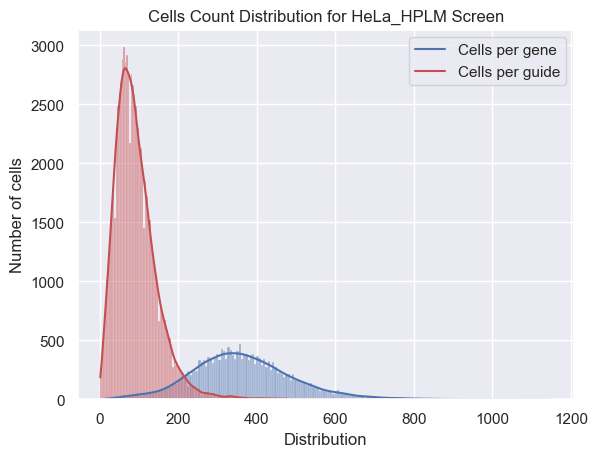

In [7]:
#plot the results
def plot_distribution(df_count,data_set):
    sns.set_theme()

    fig, ax = plt.subplots()

    counts_1 = df_count.groupby('Metadata_Foci_Barcode_MatchedTo_GeneCode').sum()
    counts_1 = counts_1.query('Cell_Count  < 1300')
    counts_1 = counts_1['Cell_Count']
    counts_2 = df_count.groupby('Metadata_Foci_Barcode_MatchedTo_Barcode').sum()
    counts_2 = counts_2.query('Cell_Count  < 800')
    counts_2 = counts_2['Cell_Count']
    
    sns.histplot(counts_1 ,color='b' ,bins= 200, kde=True, alpha=0.5,ax = ax);
    sns.histplot(counts_2 ,color='r' ,bins= 200, kde=True, alpha=0.5,ax = ax);

    ax.set_title(f'Cells Count Distribution for {data_set} Screen')
    ax.set_ylabel('Number of cells')
    ax.set_xlabel('Distribution')

    ax.legend(['Cells per gene','Cells per guide'])

    fig.savefig(os.path.join(output_folder,f'{data_set}_cells_gene_distribution.png'),
                dpi=200,
                facecolor='w',
                edgecolor='w')
    plt.show()

plot_distribution(df_A549_count_no_control,'A549')
plot_distribution(df_DMEM_count_no_control,'HeLa_DMEM')
plot_distribution(df_HPLM_count_no_control,'HeLa_HPLM')